This notebook will help me understand Principal Component Analysis or PCA.

The references used are:

- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- http://setosa.io/ev/principal-component-analysis/

Why use PCA:

- To bring out the best relationship between independent variables in a dataset. 
- It is used for feature extraction wherein two or more independent variables are combined as one variable. This was features can be reduced without loosing important relationships between variables.
- It makes variables independent. Thus for tasks like regression where input features should be independent while dependent variable Y depends on the same. 
- Find strong pattern in the variables. 

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_regression

## Case of 2D data

###### Let's prepare some synthetic data

In [2]:
x1 = np.array([4,2,1,6,4,7,8,9])
x2 = np.array([15,9,4,20,11, 19,26,30])

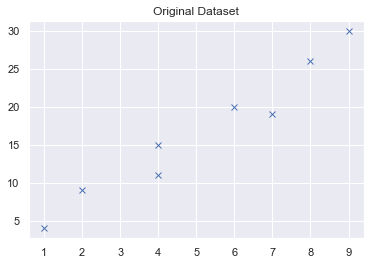

In [3]:
plt.plot(x1,x2, 'x');
plt.title('Original Dataset');

#### General Steps

- Calculate a matrix that summarizes how variables relate to each other.
- Break this matrix to two components:
    - Direction
    - Magnitude
- Transform original data to align with these directions
Let's see at the directions

In [4]:
dir1x = [4, 5]; dir1y = [25, 20]
dir2x = [5, 6]; dir2y = [20, 25]

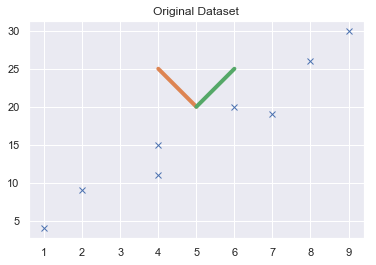

In [5]:
plt.plot(x1,x2, 'x');
plt.plot(dir1x, dir1y, dir2x, dir2y, lw=4);
plt.title('Original Dataset');

> Which one of the following direction is more revelant for this dataset?

Let's walk through an algorithm to perform PCA

1) Split the dataset into label and features if your dataset is labeled. Since our dummy dataset donot have any label we are proceeding to step <br>
2) For each column, subtract the mean of that column from each entry.

In [44]:
x1_mean_zero = x1-np.mean(x1)
x2_mean_zero = x2-np.mean(x2)

In [45]:
print("x1 with zero mean: ", x1_mean_zero, np.mean(x1_mean_zero))
print("x2 with zero mean: ", x2_mean_zero, np.mean(x2_mean_zero))

x1 with zero mean:  [-1.125 -3.125 -4.125  0.875 -1.125  1.875  2.875  3.875] 0.0
x2 with zero mean:  [ -1.75  -7.75 -12.75   3.25  -5.75   2.25   9.25  13.25] 0.0


3) Decide whether or not to standardize.

In [46]:
x1_mean_std = x1_mean_zero/np.std(x1)
x2_mean_std = x2_mean_zero/np.std(x2)

In [47]:
print("x1 with zero mean and std 1: ", x1_mean_std, np.mean(x1_mean_std), np.std(x1_mean_std))
print("x2 with zero mean and std 1: ", x2_mean_std, np.mean(x2_mean_std), np.std(x2_mean_std))

x1 with zero mean and std 1:  [-0.42192651 -1.17201808 -1.54706386  0.32816506 -0.42192651  0.70321085
  1.07825663  1.45330242] 5.551115123125783e-17 1.0
x2 with zero mean and std 1:  [-0.21389632 -0.94725511 -1.55838744  0.39723602 -0.70280218  0.27500955
  1.13059481  1.61950068] 5.551115123125783e-17 1.0


In [8]:
X = np.array(list(zip(x1_mean_zero,x2_mean_zero)))
print("Shape of X: ", X.shape)

Shape of X:  (8, 2)


In [9]:
X

array([[ -1.125,  -1.75 ],
       [ -3.125,  -7.75 ],
       [ -4.125, -12.75 ],
       [  0.875,   3.25 ],
       [ -1.125,  -5.75 ],
       [  1.875,   2.25 ],
       [  2.875,   9.25 ],
       [  3.875,  13.25 ]])

In [10]:
X_transpose = X.T
print("Shape of X transposed: ", X_transpose.shape)

Shape of X transposed:  (2, 8)


In [11]:
covar_mat = np.matmul(X,X_transpose)

In [12]:
print("Shape:", covar_mat.shape)

Shape: (8, 8)


5) Calculate the eigenvectors and their corresponding eigenvalues of the resulting covariance matrix.

In [13]:
eigenvalue, eigenvector = np.linalg.eig(covar_mat)

In [14]:
print("Eigen Values:\n", eigenvalue)
print("Shape: ", eigenvalue.shape)
print("\n")
print("Eigen Vector:\n", eigenvector)
print("Shape: ", eigenvector.shape)

Eigen Values:
 [ 5.89880427e+02  2.49457336e+00  1.07443375e-14 -5.82502628e-15
 -5.78858590e-16 -9.52604705e-17  7.14444488e-17 -5.22599346e-18]
Shape:  (8,)


Eigen Vector:
 [[-0.08273115  0.34138183  0.33314926 -0.03412406  0.00636302 -0.00106634
   0.00834858  0.00647547]
 [-0.34311477  0.39174815 -0.22903021 -0.17256535  0.01690263  0.00209651
   0.00371259  0.00208969]
 [-0.55174919  0.03163805 -0.5274579   0.62996971 -0.5226164  -0.23437144
   0.5819574   0.50075379]
 [ 0.13843115  0.09836888 -0.03297453  0.03928043  0.01398375 -0.42443807
   0.31134491 -0.39785488]
 [-0.23961639 -0.4292047   0.09201218 -0.16792449  0.17212119 -0.64096024
   0.01393771  0.05879218]
 [ 0.11173772 -0.69740081 -0.24065657  0.19301174 -0.29099513  0.26505726
   0.1056502   0.00975492]
 [ 0.39881476  0.04800256  0.22288355 -0.34108383  0.41649657 -0.52740929
   0.74234844  0.7629313 ]
 [ 0.56822787  0.21546603 -0.66422788  0.6235877  -0.66225155 -0.07530524
  -0.04323212  0.07276666]]
Shape:  (8, 8)


6) Sort the eigenvalues from largest to smallest. Sort corresponding eigen vector too. 

In [15]:
# Get the sort index
sort_index = np.argsort(eigenvalue)

In [16]:
sort_index

array([3, 4, 5, 7, 6, 2, 1, 0], dtype=int64)

In [17]:
# Sort eigenvalue
eigenvalue = np.sort(eigenvalue)

In [18]:
eigenvalue

array([-5.82502628e-15, -5.78858590e-16, -9.52604705e-17, -5.22599346e-18,
        7.14444488e-17,  1.07443375e-14,  2.49457336e+00,  5.89880427e+02])

In [19]:
# Sort eigen vector as per sort index
eigenvector = eigenvector[:,sort_index]

In [20]:
eigenvector

array([[-0.03412406,  0.00636302, -0.00106634,  0.00647547,  0.00834858,
         0.33314926,  0.34138183, -0.08273115],
       [-0.17256535,  0.01690263,  0.00209651,  0.00208969,  0.00371259,
        -0.22903021,  0.39174815, -0.34311477],
       [ 0.62996971, -0.5226164 , -0.23437144,  0.50075379,  0.5819574 ,
        -0.5274579 ,  0.03163805, -0.55174919],
       [ 0.03928043,  0.01398375, -0.42443807, -0.39785488,  0.31134491,
        -0.03297453,  0.09836888,  0.13843115],
       [-0.16792449,  0.17212119, -0.64096024,  0.05879218,  0.01393771,
         0.09201218, -0.4292047 , -0.23961639],
       [ 0.19301174, -0.29099513,  0.26505726,  0.00975492,  0.1056502 ,
        -0.24065657, -0.69740081,  0.11173772],
       [-0.34108383,  0.41649657, -0.52740929,  0.7629313 ,  0.74234844,
         0.22288355,  0.04800256,  0.39881476],
       [ 0.6235877 , -0.66225155, -0.07530524,  0.07276666, -0.04323212,
        -0.66422788,  0.21546603,  0.56822787]])

In [21]:
## Reversing the order of eigenvalues and eigenvectors (Largest to Smallest)
eigenvalue = eigenvalue[::-1]
eigenvector = eigenvector[:,::-1]

7) Calculate X* = X(eigenvector*)

In [22]:
X_transformed = np.matmul(eigenvector, X)

In [27]:
print("Principal Compnent:\n", X_transformed)
print("Original Data:\n", X)

Principal Compnent:
 [[-2.46390272 -7.15436898]
 [-0.50872635 -1.64083637]
 [ 3.14264152  9.44304291]
 [-0.21051077  2.41017813]
 [-0.18032225  0.20471332]
 [ 3.53614246  9.02703836]
 [-2.8399767  -7.73937186]
 [ 1.6788935   7.21300566]]
Original Data:
 [[ -1.125  -1.75 ]
 [ -3.125  -7.75 ]
 [ -4.125 -12.75 ]
 [  0.875   3.25 ]
 [ -1.125  -5.75 ]
 [  1.875   2.25 ]
 [  2.875   9.25 ]
 [  3.875  13.25 ]]


In [24]:
x1_transformed = X_transformed[:,:-1].flatten()
x2_transformed = X_transformed[:,1:].flatten()

In [28]:
x1_transformed

array([-2.46390272, -0.50872635,  3.14264152, -0.21051077, -0.18032225,
        3.53614246, -2.8399767 ,  1.6788935 ])

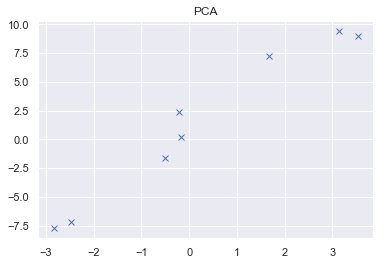

In [29]:
plt.plot(x1_transformed,x2_transformed, 'x');
plt.title('PCA');

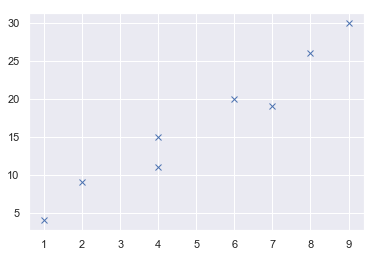

In [36]:
plt.plot(x1, x2, 'x')